# Portfolio Construction and Analysis -- Execution using IBKR API
## Objectives
1. Select some assets based on their historical performances as portfolio.
2. Execute the trades using IBKR API

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sys
sys.path.insert(0, r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\python_files')
import functions_1 as fnc
from ib_insync import *
util.startLoop()

## Assets
First I will select the assets I want in my portfolio, this will be done manually although there can be advanced methods of doing this but right now I don't know how to do it and it's not my goal too, so I will first select a bunchg of ETFs from Yahoo Finance and then check their previous performances and run a backtest too, then I will execute the suitable portfolio weights in a simulated IBKR account which currently has $1000000 balance in it. I will rebalnce this portfolio on quarterly basis. This is the first portfolio I am running a forward test in but as I learn more and gather more knowlege and ideas I will do some much more advanced type of long term portfolio executions.

So far I have developed all the tools I need in order to analyze a portfolio but now comes the main part which is deciding and then actually executing my ideas.

In [340]:
tickers = ['VWEHX', 'VGTSX', 'VIMSX', 'VIVAX', 'VISVX', 'NAESX', 'VWO', 'SPY', 'GLD', 'USRT', 'IAU', 'VGLT', 'VONG', 'IXUS', 'VCSH', 'VTIP',
            'VCIT', 'TLT', 'BNDX', 'QQQ', 'BND', 'VXUS']
r_d_all = fnc.get_returns_data(tickers=tickers, replace_tickers=None, interval='1d', dividends=True)

In [346]:
r_d_all.index = pd.to_datetime(r_d_all.index.date)

In [347]:
r_d_all

,VWEHX,VGTSX,VIMSX,VIVAX,VISVX,NAESX,VWO,SPY,GLD,USRT,...,VONG,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS
1980-01-03,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-11,0.000303,0.000351,-0.002943,-0.002444,-0.003876,-0.004089,0.002843,-0.000368,0.001973,-0.005981,...,0.002156,0.000368,0.002334,0.002385,0.003518,0.003163,0.003365,0.001985,0.003339,0.000390
2024-01-12,0.000302,0.002103,-0.001827,0.000129,-0.002529,-0.002395,0.003168,0.000579,0.009794,0.004544,...,0.000837,0.002942,0.001746,0.002379,0.001957,-0.001109,0.000000,0.000490,0.001313,0.002596
2024-01-16,-0.000605,-0.010142,-0.006056,-0.004899,-0.008192,-0.007288,-0.013964,-0.003070,-0.009488,-0.003912,...,-0.001194,-0.014298,-0.002034,-0.001865,-0.004964,-0.009937,-0.003833,-0.000093,-0.004547,-0.013462
2024-01-17,-0.000605,-0.008126,-0.007084,-0.004794,-0.007080,-0.006824,-0.008935,-0.004645,-0.011016,-0.012764,...,-0.004424,-0.008802,-0.001650,-0.001359,-0.001963,NaN,-0.002244,-0.005383,-0.001493,-0.008135


In [348]:
r_d_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11104 entries, 1980-01-03 to 2024-01-18
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWEHX   11103 non-null  float64
 1   VGTSX   6976 non-null   float64
 2   VIMSX   6455 non-null   float64
 3   VIVAX   7858 non-null   float64
 4   VISVX   6455 non-null   float64
 5   NAESX   11103 non-null  float64
 6   VWO     4746 non-null   float64
 7   SPY     7797 non-null   float64
 8   GLD     4822 non-null   float64
 9   USRT    4205 non-null   float64
 10  IAU     4774 non-null   float64
 11  VGLT    3533 non-null   float64
 12  VONG    3352 non-null   float64
 13  IXUS    2824 non-null   float64
 14  VCSH    3560 non-null   float64
 15  VTIP    2830 non-null   float64
 16  VCIT    3560 non-null   float64
 17  TLT     5403 non-null   float64
 18  BNDX    2674 non-null   float64
 19  QQQ     6255 non-null   float64
 20  BND     4223 non-null   float64
 21  VXUS    3263 non-n

In [366]:
fnc.start_dates(r_d_all)

{'VWEHX': Timestamp('1980-01-03 00:00:00'),
 'NAESX': Timestamp('1980-01-03 00:00:00'),
 'VIVAX': Timestamp('1992-11-02 00:00:00'),
 'SPY': Timestamp('1993-02-01 00:00:00'),
 'VGTSX': Timestamp('1996-04-30 00:00:00'),
 'VIMSX': Timestamp('1998-05-22 00:00:00'),
 'VISVX': Timestamp('1998-05-22 00:00:00'),
 'QQQ': Timestamp('1999-03-11 00:00:00'),
 'TLT': Timestamp('2002-07-31 00:00:00'),
 'GLD': Timestamp('2004-11-19 00:00:00'),
 'IAU': Timestamp('2005-01-31 00:00:00'),
 'VWO': Timestamp('2005-03-11 00:00:00'),
 'BND': Timestamp('2007-04-11 00:00:00'),
 'USRT': Timestamp('2007-05-07 00:00:00'),
 'VCSH': Timestamp('2009-11-24 00:00:00'),
 'VCIT': Timestamp('2009-11-24 00:00:00'),
 'VGLT': Timestamp('2010-01-05 00:00:00'),
 'VONG': Timestamp('2010-09-23 00:00:00'),
 'VXUS': Timestamp('2011-01-31 00:00:00'),
 'VTIP': Timestamp('2012-10-17 00:00:00'),
 'IXUS': Timestamp('2012-10-25 00:00:00'),
 'BNDX': Timestamp('2013-06-05 00:00:00')}

In [367]:
r_d = r_d_all.dropna()
r_d

,VWEHX,VGTSX,VIMSX,VIVAX,VISVX,NAESX,VWO,SPY,GLD,USRT,...,VONG,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS
2013-06-05,-0.000629,-0.012614,-0.011844,-0.009054,-0.012003,-0.011959,-0.016707,-0.010895,0.002145,-0.006572,...,-0.013624,-0.017007,-0.000227,0.000000,-0.002445,0.009264,0.001193,-0.012433,-0.000283,-0.016857
2013-06-06,-0.000210,0.002737,0.009871,0.006526,0.008797,0.010023,0.008395,0.007023,0.007453,0.012313,...,0.007487,0.003268,-0.000341,-0.000604,0.003628,-0.000409,-0.001389,0.004638,0.001037,0.005651
2013-06-07,0.000210,0.003640,0.011868,0.008818,0.007890,0.008426,-0.003568,0.009887,-0.023804,-0.003994,...,0.012428,0.007281,0.000797,-0.002014,-0.003029,-0.012049,-0.001989,0.013060,-0.001978,0.005619
2013-06-10,0.000000,0.000453,-0.000690,0.000257,0.002060,0.002043,-0.011538,0.000000,0.004952,-0.002734,...,0.000000,-0.000190,0.000000,0.000000,-0.003919,-0.003197,-0.007172,0.000390,-0.001981,-0.000771
2013-06-11,-0.000629,-0.009063,-0.010356,-0.006940,-0.010279,-0.009821,-0.016100,-0.008041,-0.005152,-0.012976,...,-0.007594,-0.012747,-0.001251,-0.002018,-0.002460,0.007959,-0.000201,-0.009502,0.000377,-0.012919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-09,0.000000,-0.005240,-0.004477,-0.003844,-0.006367,-0.005854,-0.007794,-0.001268,0.000319,-0.003293,...,0.002181,-0.007564,0.000292,0.000000,0.000655,-0.003609,-0.000640,0.001884,-0.000088,-0.007242
2024-01-10,0.000303,0.001756,0.002670,0.000000,0.001942,0.001707,-0.000669,0.004724,-0.002288,0.002447,...,0.009310,0.002581,0.000389,0.000000,-0.000572,-0.002629,-0.001120,0.006465,-0.001141,0.003256
2024-01-11,0.000303,0.000351,-0.002943,-0.002444,-0.003876,-0.004089,0.002843,-0.000368,0.001973,-0.005981,...,0.002156,0.000368,0.002334,0.002385,0.003518,0.003163,0.003365,0.001985,0.003339,0.000390
2024-01-12,0.000302,0.002103,-0.001827,0.000129,-0.002529,-0.002395,0.003168,0.000579,0.009794,0.004544,...,0.000837,0.002942,0.001746,0.002379,0.001957,-0.001109,0.000000,0.000490,0.001313,0.002596


In [352]:
annu_r = fnc.annualize_returns(r_d, 252)
annu_r.plot.bar(title= 'Annualized Returns', figsize=(12, 6))

ZeroDivisionError: division by zero

<Axes: title={'center': 'Annualized Volatility'}>

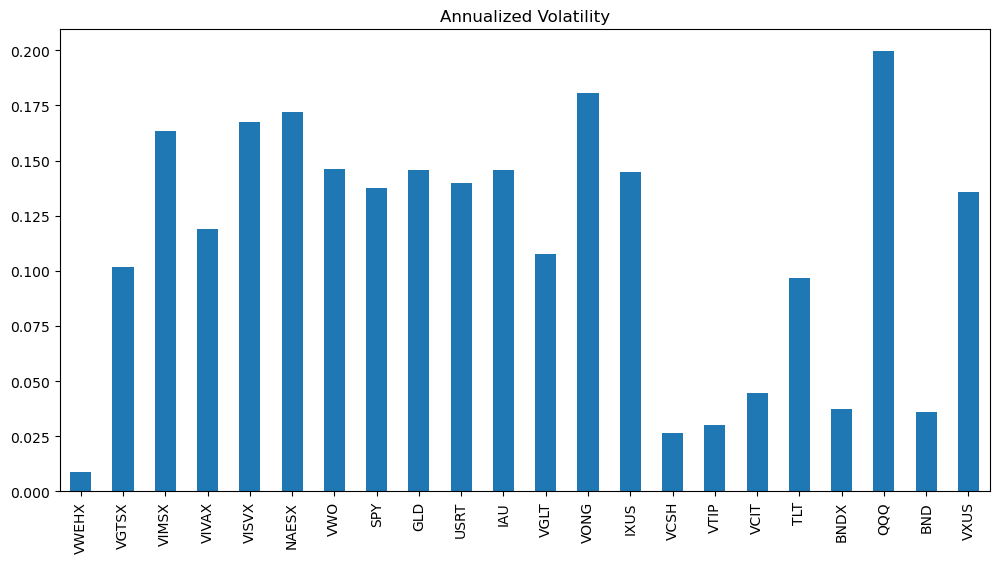

In [ ]:
fnc.annualize_vol(r_d, 252).plot.bar(title= 'Annualized Volatility', figsize=(12, 6))

<Axes: title={'center': 'Sharpe Ratio of Individual Assets'}>

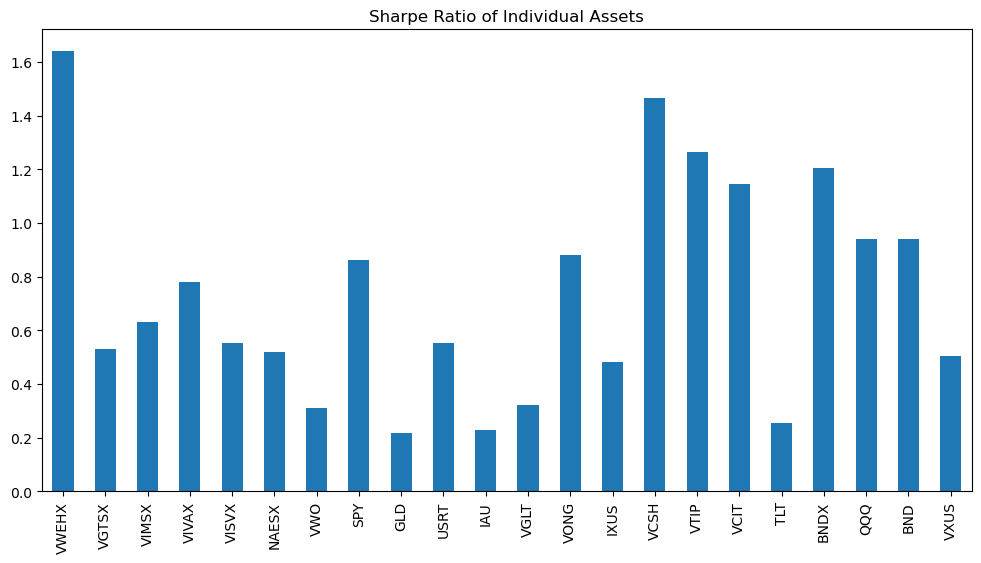

In [ ]:
fnc.sharpe_ratio(r_d, 0, 252).plot.bar(figsize=(12,6), title='Sharpe Ratio of Individual Assets')

In [ ]:
import seaborn as sns

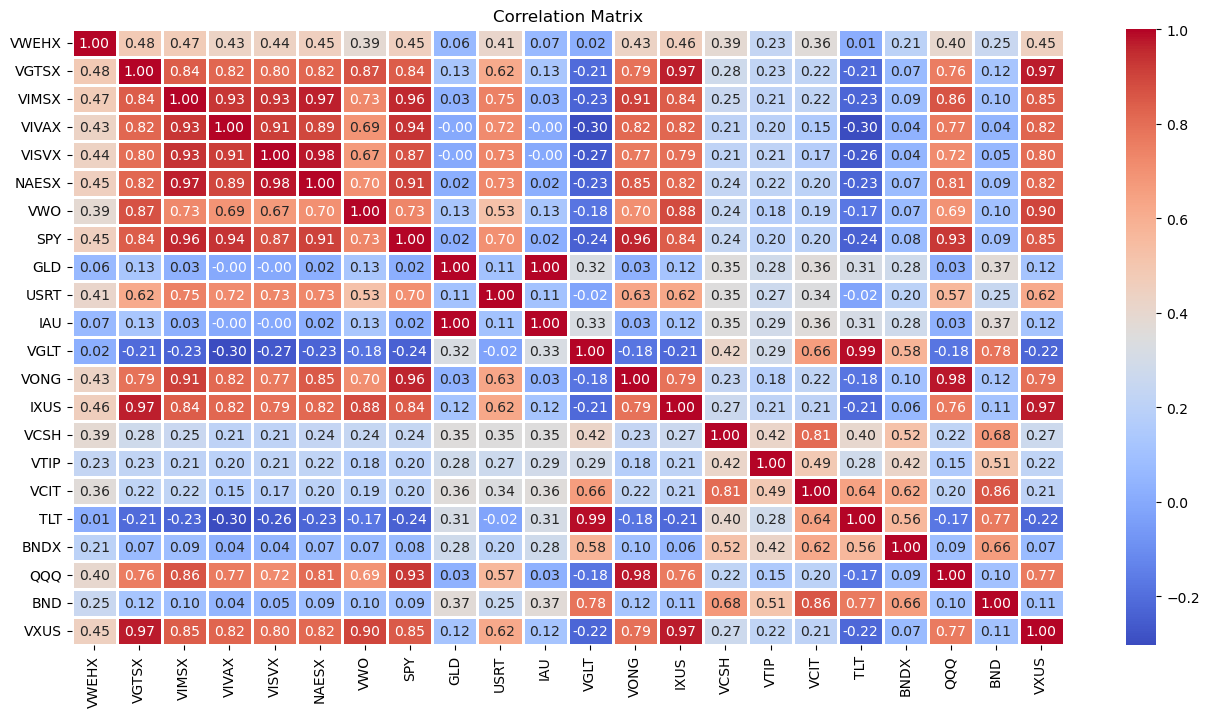

In [ ]:
corr = r_d.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
r_d.corr().describe()

,VWEHX,VGTSX,VIMSX,VIVAX,VISVX,NAESX,VWO,SPY,GLD,USRT,...,VONG,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.357412,0.514853,0.523057,0.481135,0.480595,0.505921,0.462062,0.516052,0.230010,0.463913,...,0.498553,0.510495,0.379158,0.303765,0.395607,0.128856,0.277807,0.476363,0.342490,0.511879
std,0.212816,0.398799,0.429442,0.437927,0.424739,0.422132,0.363430,0.433114,0.281170,0.280335,...,0.401994,0.402712,0.207324,0.184744,0.256489,0.431739,0.269379,0.391670,0.309962,0.405498
min,0.013067,-0.210483,-0.230523,-0.303702,-0.267713,-0.232160,-0.177693,-0.239906,-0.002128,-0.020128,...,-0.181257,-0.213467,0.207229,0.153155,0.150016,-0.303314,0.036258,-0.176843,0.042835,-0.224075
25%,0.238042,0.149098,0.124932,0.069630,0.083709,0.115988,0.139328,0.120567,0.029726,0.254876,...,0.134964,0.140583,0.238325,0.209586,0.204899,-0.219173,0.071681,0.114478,0.101756,0.140216
50%,0.406095,0.688223,0.737849,0.704919,0.694051,0.713867,0.598198,0.716698,0.121752,0.546152,...,0.666712,0.692283,0.315242,0.229080,0.281690,-0.097261,0.152117,0.630985,0.185075,0.693331
75%,0.450190,0.838678,0.897943,0.823685,0.797735,0.842151,0.723237,0.898530,0.321321,0.683451,...,0.810479,0.836521,0.413124,0.287377,0.587481,0.377679,0.494754,0.765236,0.622376,0.840093
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Portfolio Selection
Now that we have got assets that we want to buy let's analyze which portfolio weighting scheme will be most suitable for us.

<Axes: xlabel='Volatility'>

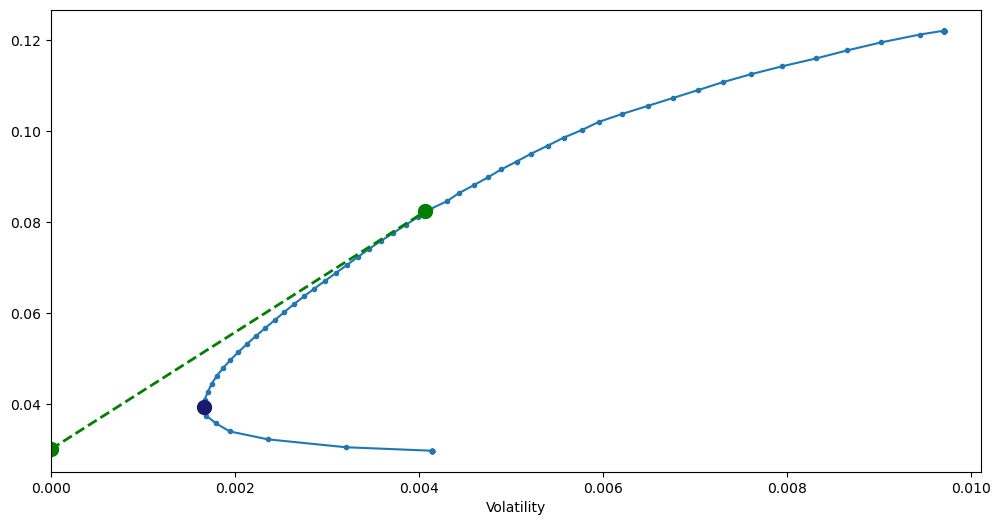

In [ ]:
cov = r_d.cov()
fnc.plot_ef(100, annu_r, cov, show_gmv=True, show_msr=True, riskfree_rate=0.03, max_asset_weight=0.15) #max allocation for each asset = 15%

## Backtests
Backtest and analyze the results of backtesting results of different types of portfolios

In [ ]:
target_rets = [0.06, 0.08, 0.10]
backtest = fnc.combined_backtesting_result(r_d_all.dropna(), portfolios=['GMV', 'MSR', 'EW', 'TR'], periods_per_year=252, starting_balance=1000, starting_step=900,
                                            rolling_period=0, reweight_period=90, weights_column=True, max_asset_weight=0.10, riskfree_rate=0.03,
                                              target_returns=target_rets)

In [ ]:
backtest

Global Minimum Variance                                          \
                           Returns Account History  Drawdown Previous Peak   
2016-12-29                0.001634     1001.633839  0.000000   1001.633839   
2016-12-30                0.000585      1002.21946  0.000000   1002.219460   
2017-01-03                0.001278     1003.500517  0.000000   1003.500517   
2017-01-04                0.002130     1005.638346  0.000000   1005.638346   
2017-01-05                0.003004     1008.659498  0.000000   1008.659498   
...                            ...             ...       ...           ...   
2024-01-09               -0.001456     1348.316772 -0.013358   1366.571891   
2024-01-10               -0.000619     1347.482012 -0.013969   1366.571891   
2024-01-11                0.001984     1350.155123 -0.012013   1366.571891   
2024-01-12                0.001123     1351.671387 -0.010904   1366.571891   
2024-01-16               -0.005360     1344.425791 -0.016206   1366.571891   

                                                               \
                                                      Weights   
2016-12-29  {'VWEHX': 0.10000005734392384, 'VGTSX': 0.0857...   
2016-12-30  {'VWEHX': 0.10000005734392384, 'VGTSX': 0.0857...   
2017-01-03  {'VWEHX': 0.10000005734392384, 'VGTSX': 0.0857...   
2017-01-04  {'VWEHX': 0.10000005734392384, 'VGTSX': 0.0857...   
2017-01-05  {'VWEHX': 0.10000005734392384, 'VGTSX': 0.0857...   
...                                                       ...   
2024-01-09  {'VWEHX': 0.09999992515138018, 'VGTSX': 0.0999...   
2024-01-10  {'VWEHX': 0.09999992515138018, 'VGTSX': 0.0999...   
2024-01-11  {'VWEHX': 0.09999992515138018, 'VGTSX': 0.0999...   
2024-01-12  {'VWEHX': 0.09999992515138018, 'VGTSX': 0.0999...   
2024-01-16  {'VWEHX': 0.09999992515138018, 'VGTSX': 0.0999...   

           Maximum Sharpe Ratio                                          \
                        Returns Account History  Drawdown Previous Peak   
2016-12-29             0.001152     1001.151697  0.000000   1001.151697   
2016-12-30            -0.000996     1000.154107 -0.000996   1001.151697   
2017-01-03             0.002660     1002.814881  0.000000   1002.814881   
2017-01-04             0.003595     1006.419819  0.000000   1006.419819   
2017-01-05             0.002372     1008.807029  0.000000   1008.807029   
...                         ...             ...       ...           ...   
2024-01-09            -0.000374     1609.434134 -0.007910   1622.266553   
2024-01-10             0.001457     1611.779748 -0.006464   1622.266553   
2024-01-11             0.002032     1615.055657 -0.004445   1622.266553   
2024-01-12             0.000932     1616.560564 -0.003517   1622.266553   
2024-01-16            -0.003772     1610.463117 -0.007276   1622.266553   

                                                               ...  \
                                                      Weights  ...   
2016-12-29  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
2016-12-30  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
2017-01-03  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
2017-01-04  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
2017-01-05  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
...                                                       ...  ...   
2024-01-09  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
2024-01-10  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
2024-01-11  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
2024-01-12  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   
2024-01-16  {'VWEHX': 0.0, 'VGTSX': 0.0, 'VIMSX': 0.0, 'VI...  ...   

           Target Returns 8.0%                                          \
                       Returns Account History  Drawdown Previous Peak   
2016-12-29            0.001576     1001.576449  0.000000   1001.576449   
2016-12-30           -0.001683      999.8

In [ ]:
rets = backtest.xs('Returns', level=1, axis=1)
hist = backtest.xs('Account History', level=1, axis=1)
weights = backtest.xs('Weights', level=1, axis=1)
drawdown = backtest.xs('Drawdown', level=1, axis=1)
prev_peak = backtest.xs('Previous Peak', level=1, axis=1)

In [ ]:
# Add S&P500 returns to returns dataframe in order to compare
sp500 = fnc.get_returns_data(tickers=['^GSPC'], start = rets.index[0], end = rets.index[-1], interval='1d')
sp500.index = sp500.index.date
rets['S&P500'] = sp500

C:\Users\user\AppData\Local\Temp\ipykernel_11380\2219055362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rets['S&P500'] = sp500


In [ ]:
fnc.summary_stats(rets, periods_per_year=252)

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic Cvar (5%),Sharpe Ratio,Max Drawdown,Time Period
Global Minimum Variance,0.042988,0.040766,-1.275519,20.573294,0.003994,0.005885,1.054530,-0.110671,"-2574 days, 0:00:00"
Maximum Sharpe Ratio,0.070116,0.066322,-0.700468,11.969186,0.006630,0.009955,1.057207,-0.166529,"-2574 days, 0:00:00"
Equally Weighted,0.077035,0.085855,-1.037404,18.546302,0.008373,0.012804,0.897274,-0.169812,"-2574 days, 0:00:00"
Target Returns 6.0%,0.081947,0.084250,-0.076656,13.668549,0.007373,0.012293,0.972657,-0.175925,"-2574 days, 0:00:00"
Target Returns 8.0%,0.084272,0.123420,-0.953654,16.463310,0.012296,0.018944,0.682808,-0.228996,"-2574 days, 0:00:00"
Target Returns 10.0%,0.086274,0.142394,-1.410779,20.525846,0.014470,0.021821,0.605880,-0.278270,"-2574 days, 0:00:00"
S&P500,0.113289,0.192608,-0.543140,17.757286,0.017644,NaN,0.588187,-0.339250,"-2573 days, 0:00:00"


<Axes: title={'center': 'Performance of different Portfolio schemes'}>

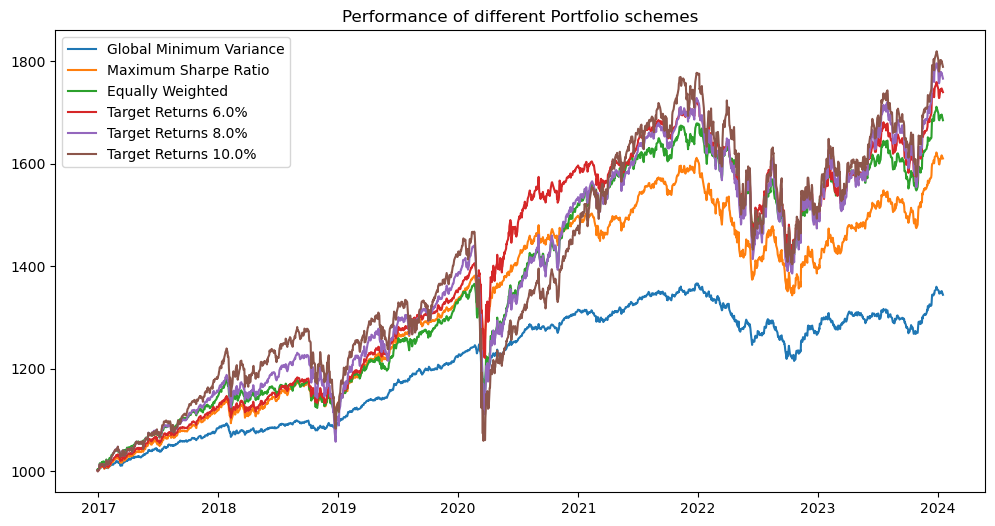

In [ ]:
hist.plot(figsize=(12, 6), title= 'Performance of different Portfolio schemes')

In [ ]:
weights_each_portfolio = fnc.weights_change(weights)

In [ ]:
sp_500 = fnc.get_returns_data(tickers=['^GSPC'], start=backtest.index[0], end=backtest.index[-1], interval='1d')
sp_500 = sp_500.rename(columns={'^GSPC': 'S&P 500'})
sp_500

,S&P 500
Date,
2016-12-30 00:00:00-05:00,-0.004637
2017-01-03 00:00:00-05:00,0.008487
2017-01-04 00:00:00-05:00,0.005722
2017-01-05 00:00:00-05:00,-0.000771
2017-01-06 00:00:00-05:00,0.003517
...,...
2024-01-08 00:00:00-05:00,0.014115
2024-01-09 00:00:00-05:00,-0.001478
2024-01-10 00:00:00-05:00,0.005666
